# SpaCy Embeddings Study
---
Glenn Abastillas

In [32]:
import spacy as sp
import numpy as np
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import brown

### Load Corpus

In [5]:
raw_text = '. '.join([' '.join(sent) for sent in brown.sents('cp01')])

In [6]:
nlp = sp.load('en_core_web_md')

text = nlp(raw_text)

### Inspect Corpus

In [7]:
for i, token in enumerate(text):
    print(f'Token: {str(token):>10}\t\tLemma: {token.lemma_:>10}')
    if i > 11:
        break

Token:       They		Lemma:     -PRON-
Token:    neither		Lemma:    neither
Token:      liked		Lemma:       like
Token:        nor		Lemma:        nor
Token:   disliked		Lemma:    dislike
Token:        the		Lemma:        the
Token:        Old		Lemma:        Old
Token:        Man		Lemma:        Man
Token:         ..		Lemma:         ..
Token:         To		Lemma:         to
Token:       them		Lemma:     -PRON-
Token:         he		Lemma:     -PRON-
Token:      could		Lemma:      could


Define similarity function

In [8]:
def similarity(a, b):
    return (a @ b) / (np.sqrt(a @ a) * np.sqrt(b @ b))

## Demonstrate Algebra with Vectors

In [9]:
vocab = ['man', 'woman', 'he', 'she', 'him', 'her', 'brother', 'sister']
man, woman, he, she, him, her, brother, sister = [text.vocab[_] for _ in vocab]

Syntactic relationships

In [10]:
he.similarity(him)

0.82752

In [11]:
him_ = he.vector + (her.vector - she.vector)

similarity(him_, him.vector)

0.88178796

Semantic relationships

In [12]:
sister.similarity(brother)

0.7468089

In [13]:
sibling_ = brother.vector - he.vector + she.vector

similarity(sibling_, sister.vector)

0.87216073

## Visualize Vectors like DNA

In [14]:
vectors = {name : text.vocab[name].vector for name in vocab}

In [21]:
df = pd.DataFrame(vectors)

In [26]:
df_ = df.reset_index()

In [27]:
man_df = df_.loc[:, ['man', 'index']]

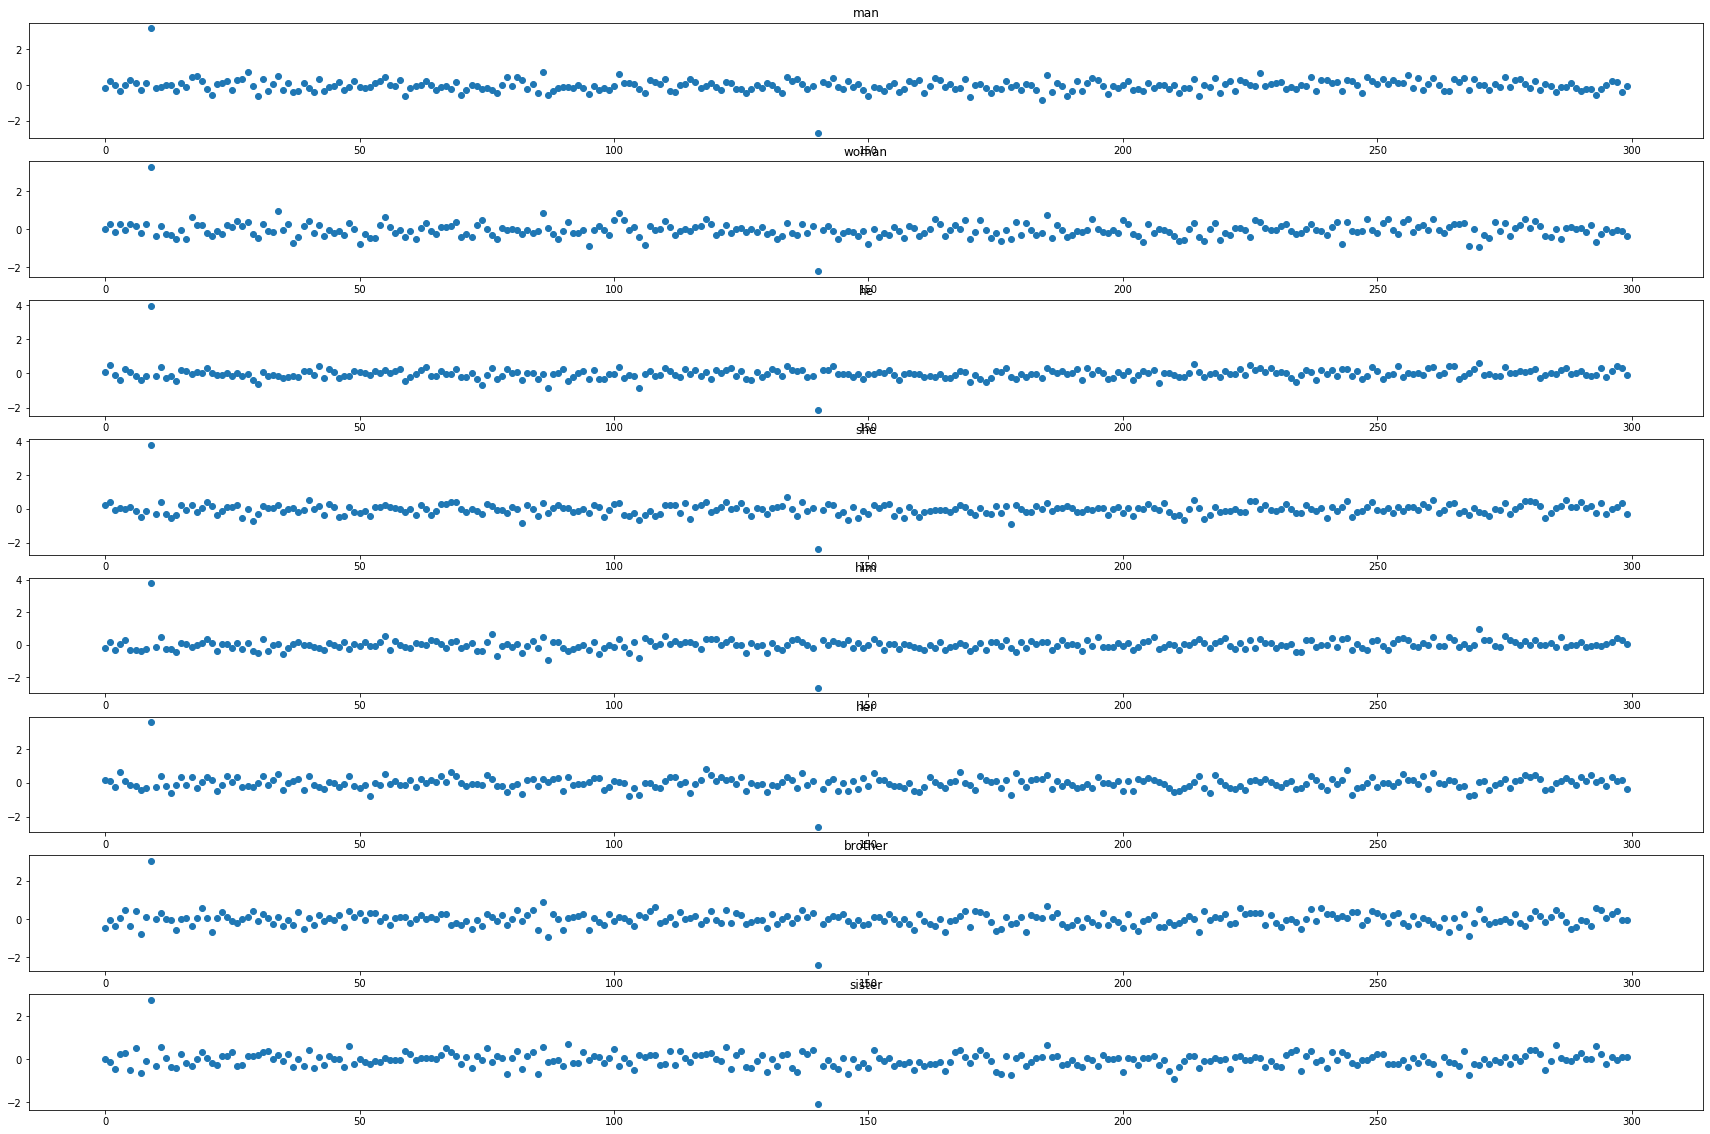

In [51]:
%matplotlib inline
fig, axes = plt.subplots(len(vocab), 1, figsize=(30, 20))

for i, ax in enumerate(axes.flatten()):
    var = vocab[i]
    
    curr_df = df_.loc[:, [var, 'index']]
    ax.scatter(data=curr_df, x='index', y=var, cmap='heatmap')
    ax.plot(data=curr_df, cmap='heatmap')
    ax.set_title(var)